#Atividade 5 - Algoritmos de Busca sem Informação

Grupo: Adriel Ferreira, Jéssica Nagahama e Kamily Assis.

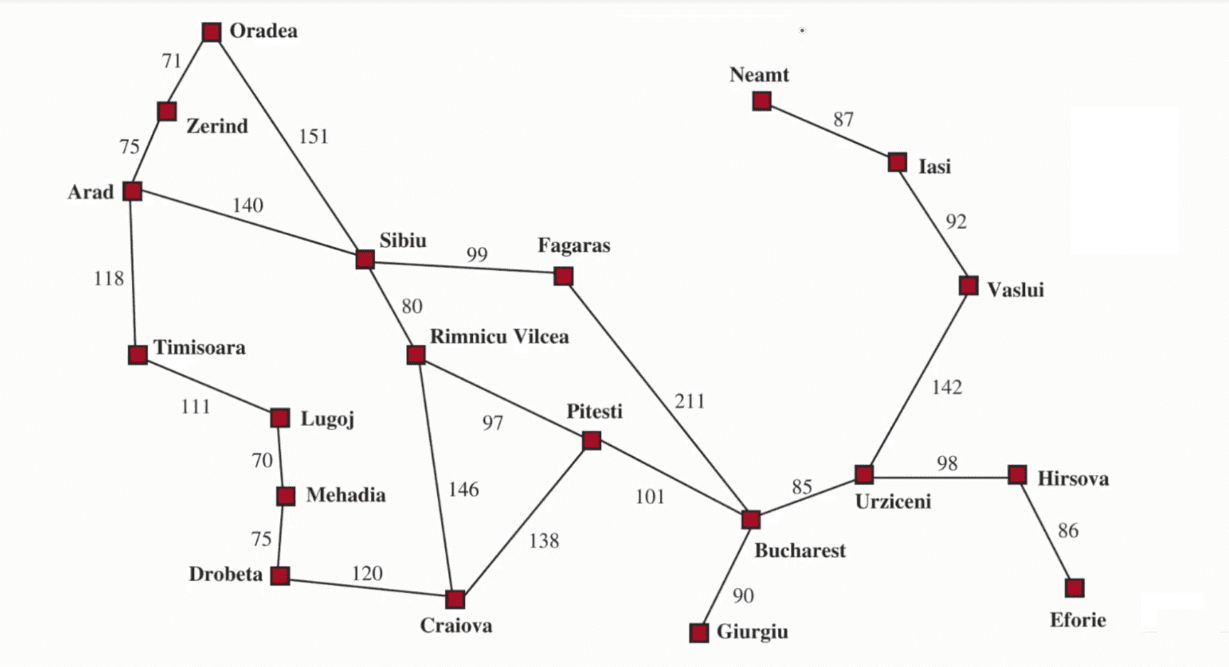



Com base nas aulas e vídeos que vimos sobre resolução de problemas por busca faça o indicado nas questões seguintes, e prepare uma apresentação demonstrando as respostas.

###Código base (professor) com comentários baseados na aula

funções comuns a todo o código:

In [ ]:
#como a ação é representada
def acao(destino, custo):
    return { 'destino': destino, 'custo': custo }

#classe dos nós de busca
class No:
    def __init__(self, estado, custo, pai, acao):
        self.estado = estado
        self.custo = custo
        self.pai = pai
        self.acao = acao

    def __str__(self):
        return f'({self.estado}, {self.custo})'

    def __repr__(self):
        return self.__str__()

    def filhos(self, problema):
        espaco_acoes = next(e for e in problema.espaco_estados if e['estado'] == self.estado)
        resultado = []
        for acao in espaco_acoes['acoes']:
            filho = No(acao['destino'], self.custo + acao['custo'], self, acao['destino'])
            resultado.append(filho)
        return resultado

    def constroi_solucao(self):
        no_atual = self
        solucao = [no_atual]
        while no_atual.pai is not None:
            no_atual = no_atual.pai
            solucao.insert(0, no_atual)
        return solucao

#as especificações do problema
class Problema:
  def __init__(self, espaco_estados, inicial, objetivo):
      self.espaco_estados = espaco_estados
      self.inicial = inicial
      self.objetivo = objetivo

In [ ]:

#espaço de estados (uma lista de dicionarios com [nome do estado : ações])
estados_romenia = [
    { 'estado': 'Arad',
      'acoes': [acao('Zerind', 75), acao('Sibiu', 140), acao('Timisoara', 118)] },

    { 'estado': 'Zerind',
      'acoes': [acao('Arad', 75), acao('Oradea', 71)] },

    { 'estado': 'Timisoara',
      'acoes': [acao('Arad', 118), acao('Lugoj', 111)] },

    { 'estado': 'Sibiu',
      'acoes': [acao('Arad', 140), acao('Oradea', 151), acao('Fagaras', 99),
                acao('Rimnicu Vilcea', 80)] },

    { 'estado': 'Oradea',
      'acoes': [acao('Zerind', 71), acao('Sibiu', 151)] },

    { 'estado': 'Lugoj',
      'acoes': [acao('Timisoara', 111), acao('Mehadia', 70)] },

    { 'estado': 'Mehadia',
      'acoes': [acao('Lugoj', 70), acao('Drobeta', 75)] },

    { 'estado': 'Drobeta',
      'acoes': [acao('Mehadia', 75), acao('Craiova', 120)] },

    { 'estado': 'Craiova',
      'acoes': [acao('Drobeta', 120), acao('Rimnicu Vilcea', 146),
                acao('Pitesti', 138)] },

    { 'estado': 'Rimnicu Vilcea',
      'acoes': [acao('Sibiu', 80), acao('Craiova', 146), acao('Pitesti', 97)] },

    { 'estado': 'Fagaras',
      'acoes': [acao('Sibiu', 99), acao('Bucharest', 211)] },

    { 'estado': 'Pitesti',
      'acoes': [acao('Rimnicu Vilcea', 97), acao('Craiova', 138), acao('Bucharest', 101)] },

    { 'estado': 'Giurgiu',
      'acoes': [acao('Bucharest', 90)] },

    { 'estado': 'Bucharest',
      'acoes': [acao('Fagaras', 211), acao('Pitesti', 101), acao('Giurgiu', 90),
                acao('Urziceni', 85)] },

    { 'estado': 'Urziceni',
      'acoes': [acao('Bucharest', 85), acao('Vaslui', 142), acao('Hirsova', 98)] },

    { 'estado': 'Hirsova',
      'acoes': [acao('Urziceni', 98), acao('Eforie', 86)] },

    { 'estado': 'Eforie',
      'acoes': [acao('Hirsova', 86)] },

    { 'estado': 'Vaslui',
      'acoes': [acao('Urziceni', 142), acao('Iasi', 92)] },

    { 'estado': 'Iasi',
      'acoes': [acao('Vaslui', 92), acao('Neamt', 87)] },

    { 'estado': 'Neamt',
      'acoes': [acao('Iasi', 87)] }
]


Código professor - comentado


In [ ]:
#a arvore - que vai apresentar os links pelos nós
class No:
  def __init__(self, estado, custo, pai, acao):
      self.estado = estado #é o que acontece após a ação
      self.custo = custo
      self.pai = pai #de onde saiu
      self.acao = acao #o que causou o estado

  def __str__(self): #transforma em string. serve pro print
      return f'({self.estado}, {self.custo})'

  def __repr__(self):
      return self.__str__()

  def filhos(self, problema):
      #vai considerar o espaço do problema
      espaco_acoes = next(e for e in problema.espaco_estados if e['estado'] == self.estado)

      #para cada ação possivel, é preciso retornar um nó
      resultado = []
      for acao in espaco_acoes['acoes']:
          filho = No(acao['destino'], self.custo + acao['custo'],
                      self, acao['destino'])
          resultado.append(filho)

      #retorna o conjunto de filhos de um certo nó
      return resultado

  #vai inverter o caminho da contrução
  def constroi_solucao(self):
      no_atual = self
      solucao = [no_atual]
      while no_atual.pai != None: #enquanto o nó tiver um pai:
          no_atual = no_atual.pai
          solucao.insert(0, no_atual)

      return solucao

#constantes que nos mostram o que está acontecendo
BUSCA_INICIANDO = 0
BUSCA_FALHOU = 1
BUSCA_SUCESSO = 2
BUSCA_EM_CURSO = 3

#guarda o espaço atual/situação da busca
class BuscaLargura:
  def __init__(self, problema): #qual o problema?
      self.problema = problema
      self.fronteira = [problema.inicial]
      self.visitados = [problema.inicial.estado]
      self.solucao = []
      self.situacao = BUSCA_INICIANDO

  def executar(self):
      while self.situacao != BUSCA_FALHOU and self.situacao != BUSCA_SUCESSO:
          self.passo_busca()

      if self.situacao == BUSCA_FALHOU:
          print("Busca falhou")
      elif self.situacao == BUSCA_SUCESSO:
          print("Busca teve sucesso")
          print(f"Solucao: {self.solucao}")

      return

  #metodo que permite ver o que está acontecendo
  def passo_busca(self):
      if (self.situacao == BUSCA_FALHOU):
          print("Busca falhou")
          return

      if (self.situacao == BUSCA_SUCESSO):
          print("Busca chegou ao objetivo com sucesso")
          return

      try:
          no = self.fronteira.pop(0)
      except IndexError:
          self.situacao = BUSCA_FALHOU #essa variavel estava errada
          return

      #faz o teste do objetivo (como sair do nó x e chegar no nó y)
      if self.problema.objetivo(no):
          self.situacao = BUSCA_SUCESSO
          self.solucao = no.constroi_solucao()
          return

      #obtem os filhos do nó
      #está na fronteira? | foi visitado?
      for filho in no.filhos(self.problema):
          if not (filho in self.fronteira) and not (filho.estado in self.visitados):
              self.fronteira.append(filho)
              self.visitados.append(filho.estado)

      #retorna o espaço de busca
      return

#espaço inicial sem nada
no_arad = No('Arad', 0, None, None)

#teste de objetivo para verificar se o estado do nó é Bucharest
problema_romenia = Problema(estados_romenia,
                            no_arad,
                            lambda no: no.estado == 'Bucharest')

In [ ]:
#testes - parte 1

no_arad
#retorna: (Arad, 0)

busca = BuscaLargura(problema_romenia)
busca.fronteira
#retorna:[(Arad, 0)]

busca.passo_busca()
busca.fronteira
#retorna:[(Zerind, 75), (Sibiu, 140), (Timisoara, 118)]

busca.visitados
#retorna: ['Arad', 'Zerind', 'Sibiu', 'Timisoara']

busca.passo_busca()
busca.fronteira
#retorna: [(Sibiu, 140), (Timisoara, 118), (Oradea, 146)]

#a cada vez que a busca é encrementada, o custo é somado
busca.passo_busca()
busca.fronteira
#retorna:[(Timisoara, 118), (Oradea, 146), (Fagaras, 239), (Rimnicu Vilcea, 220)]



[(Timisoara, 118), (Oradea, 146), (Fagaras, 239), (Rimnicu Vilcea, 220)]

In [ ]:
#teste - parte 2

busca = BuscaLargura(problema_romenia)
busca.executar()
#retorna: Busca teve sucesso | Solucao: [(Arad, 0), (Sibiu, 140), (Fagaras, 239), (Bucharest, 450)]

Busca teve sucesso
Solucao: [(Arad, 0), (Sibiu, 140), (Fagaras, 239), (Bucharest, 450)]


###1. Com o espaço de estados das cidades da Romênia, escolha duas cidades para buscar uma rota usando a implementação de busca em largura que foi vista nos vídeos. Mostre o passo a passo da busca.

In [ ]:
#refazendo a parte de busca para ver o passo a passo
class busca_largura:
    def __init__(self, problema):
        self.problema = problema
        self.fronteira = [problema.inicial]
        self.visitados = [problema.inicial.estado]
        self.solucao = []
        self.situacao = BUSCA_INICIANDO

    def executar(self):
        while self.situacao != BUSCA_FALHOU and self.situacao != BUSCA_SUCESSO:
            self.passo_busca_largura()

        if self.situacao == BUSCA_FALHOU:
            print("Busca falhou")
        elif self.situacao == BUSCA_SUCESSO:
            print("Busca teve sucesso")
            print(f"Solucao: {self.solucao}")

        return

    #codigo mantido até aqui, onde entra o metodo de passo a passo
    def passo_busca_largura(self):

        #verifica se já falhou (no objetivo)
        if self.situacao == BUSCA_FALHOU:
            print("Busca falhou")
            return

        #tratamento de exceção (para se a lista estiver vazia)
        try:
            no = self.fronteira.pop(0)
            print(f"Explorando nó: {no.estado}")
        except IndexError:
            self.situacao = BUSCA_FALHOU
            print("Fronteira vazia. Busca falhou")
            return

        #ou se já deu bom (no objetivo)
        if self.situacao == BUSCA_SUCESSO:
            print("Busca chegou ao objetivo com sucesso")
            return

        #se o problema cumpriu o objetivo, mas ainda não foi atualizado
        #constroi o caminho da solução e indica a situação como sucesso
        if self.problema.objetivo(no):
            self.situacao = BUSCA_SUCESSO
            self.solucao = no.constroi_solucao()
            return

        #se nenhum for verdade, passamos para os filhos do nó
        for filho in no.filhos(self.problema):
            if not (filho in self.fronteira) and not (filho.estado in self.visitados):
                self.fronteira.append(filho)
                self.visitados.append(filho.estado)
                print(f"Adicionando filho {filho.estado} à fronteira")

        return

In [ ]:
#Cidades escolhidas: Zerind até Fagaras

#espaço inicial (vazio)
no_zerind = No('Zerind', 0, None, None)

#verificar se o estado do nó é Fagaras
problema_romenia_zeras = Problema(estados_romenia,
                            no_zerind,
                            lambda no: no.estado == 'Fagaras')

In [ ]:
#verificando se os passos estão batendo
no_zerind
#retorna: (Zerind, 0)

busca2 = busca_largura(problema_romenia_zeras)
busca2.fronteira
#retorna: passos + [(Zerind, 0)]

busca2.passo_busca_largura()
busca2.fronteira
#retorna: passos + [(Arad, 75), (Oradea, 71)]

busca2.passo_busca_largura()
busca2.fronteira
#retorna: passos + [(Oradea, 71), (Sibiu, 215), (Timisoara, 193)]

busca2.visitados

Explorando nó: Zerind
Adicionando filho Arad à fronteira
Adicionando filho Oradea à fronteira
Explorando nó: Arad
Adicionando filho Sibiu à fronteira
Adicionando filho Timisoara à fronteira


"\nretorna:\nExplorando nó: Zerind\nAdicionando filho Arad à fronteira\nAdicionando filho Oradea à fronteira\nExplorando nó: Arad\nAdicionando filho Sibiu à fronteira\nAdicionando filho Timisoara à fronteira\n['Zerind', 'Arad', 'Oradea', 'Sibiu', 'Timisoara']\n\n"

In [ ]:
busca3 = busca_largura(problema_romenia_zeras)
busca3.executar()

Explorando nó: Zerind
Adicionando filho Arad à fronteira
Adicionando filho Oradea à fronteira
Explorando nó: Arad
Adicionando filho Sibiu à fronteira
Adicionando filho Timisoara à fronteira
Explorando nó: Oradea
Explorando nó: Sibiu
Adicionando filho Fagaras à fronteira
Adicionando filho Rimnicu Vilcea à fronteira
Explorando nó: Timisoara
Adicionando filho Lugoj à fronteira
Explorando nó: Fagaras
Busca teve sucesso
Solucao: [(Zerind, 0), (Arad, 75), (Sibiu, 215), (Fagaras, 314)]


'\nRetorna:\nExplorando nó: Zerind\nAdicionando filho Arad à fronteira\nAdicionando filho Oradea à fronteira\nExplorando nó: Arad\nAdicionando filho Sibiu à fronteira\nAdicionando filho Timisoara à fronteira\nExplorando nó: Oradea\nExplorando nó: Sibiu\nAdicionando filho Fagaras à fronteira\nAdicionando filho Rimnicu Vilcea à fronteira\nExplorando nó: Timisoara\nAdicionando filho Lugoj à fronteira\nExplorando nó: Fagaras\nBusca teve sucesso\nSolucao: [(Zerind, 0), (Arad, 75), (Sibiu, 215), (Fagaras, 314)]'

###2. Usando a implementação de busca em largura que foi vista no vídeo como base, crie uma implementação similar para a busca em profundidade. A implementação deve seguir o modelo da busca em largura e ter uma função que permita executar apenas um passo da busca de cada vez.

*Diferença da Busca em Largura para Busca em Profudidade* 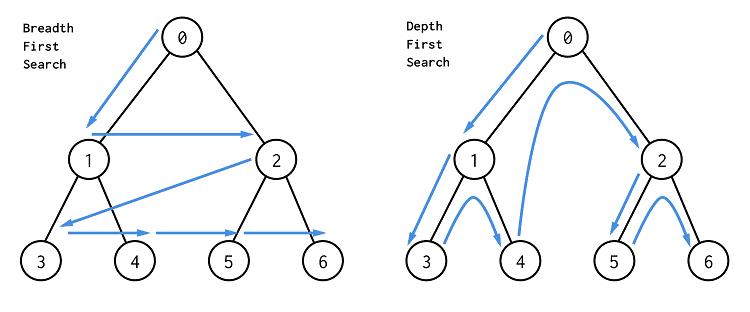

In [ ]:
#variaveis de estado da busca
BUSCA_INICIANDO = 0
BUSCA_FALHOU = 1
BUSCA_SUCESSO = 2
#busca em profundidade
class busca_profundidade:
    def __init__(self, problema):
        self.problema = problema
        self.fronteira = [problema.inicial]
        self.visitados = [problema.inicial.estado]
        self.solucao = []
        self.situacao = BUSCA_INICIANDO

    def executar(self):
        while self.situacao != BUSCA_FALHOU and self.situacao != BUSCA_SUCESSO:
            self.passo_busca_profundidade()

        if self.situacao == BUSCA_FALHOU:
            print("Busca falhou")
        elif self.situacao == BUSCA_SUCESSO:
            print("Busca teve sucesso")
            print(f"Solucao: {self.solucao}")

        return

    #o passo a passo da busca de profundidade
    def passo_busca_profundidade(self):
      if self.situacao == BUSCA_FALHOU:
          print("Busca falhou")
          return

      if self.situacao == BUSCA_SUCESSO:
          print("Busca chegou ao objetivo com sucesso")
          return

      try:
          no = self.fronteira.pop()
      except IndexError:
          self.situacao = BUSCA_FALHOU
          print("Fronteira vazia. Busca falhou.")
          return

      print(f"Explorando nó: {no}")

      if self.problema.objetivo(no):
          self.situacao = BUSCA_SUCESSO
          self.solucao = no.constroi_solucao()
          print("Nó objetivo encontrado!")
          print("Solução:")
          for n in self.solucao:
              print(n)
          return

      print(f"Nó não é objetivo. Gerando filhos para o nó: {no}")

      for filho in reversed(no.filhos(self.problema)):  # Ordem reversa para emular a busca em profundidade
          if not (filho in self.fronteira) and not (filho.estado in self.visitados):
              self.fronteira.append(filho)
              self.visitados.append(filho.estado)
              print(f"Adicionado filho à fronteira: {filho}")

      return


In [ ]:
#espaço inicial sem nada
no_zerind = No('Zerind', 0, None, None)

#teste de objetivo para verificar se o estado do nó é Bucharest
problema_romenia_zeras = Problema(estados_romenia,
                            no_zerind,
                            lambda no: no.estado == 'Fagaras')

In [ ]:
busca = busca_profundidade(problema_romenia_zeras)
busca.executar()

Explorando nó: (Zerind, 0)
Nó não é objetivo. Gerando filhos para o nó: (Zerind, 0)
Adicionado filho à fronteira: (Oradea, 71)
Adicionado filho à fronteira: (Arad, 75)
Explorando nó: (Arad, 75)
Nó não é objetivo. Gerando filhos para o nó: (Arad, 75)
Adicionado filho à fronteira: (Timisoara, 193)
Adicionado filho à fronteira: (Sibiu, 215)
Explorando nó: (Sibiu, 215)
Nó não é objetivo. Gerando filhos para o nó: (Sibiu, 215)
Adicionado filho à fronteira: (Rimnicu Vilcea, 295)
Adicionado filho à fronteira: (Fagaras, 314)
Explorando nó: (Fagaras, 314)
Nó objetivo encontrado!
Solução:
(Zerind, 0)
(Arad, 75)
(Sibiu, 215)
(Fagaras, 314)
Busca teve sucesso
Solucao: [(Zerind, 0), (Arad, 75), (Sibiu, 215), (Fagaras, 314)]


'\nRetorna:\nExplorando nó: (Zerind, 0)\nNó não é objetivo. Gerando filhos para o nó: (Zerind, 0)\nAdicionado filho à fronteira: (Oradea, 71)\nAdicionado filho à fronteira: (Arad, 75)\nExplorando nó: (Arad, 75)\nNó não é objetivo. Gerando filhos para o nó: (Arad, 75)\nAdicionado filho à fronteira: (Timisoara, 193)\nAdicionado filho à fronteira: (Sibiu, 215)\nExplorando nó: (Sibiu, 215)\nNó não é objetivo. Gerando filhos para o nó: (Sibiu, 215)\nAdicionado filho à fronteira: (Rimnicu Vilcea, 295)\nAdicionado filho à fronteira: (Fagaras, 314)\nExplorando nó: (Fagaras, 314)\nNó objetivo encontrado!\nSolução:\n(Zerind, 0)\n(Arad, 75)\n(Sibiu, 215)\n(Fagaras, 314)\nBusca teve sucesso\nSolucao: [(Zerind, 0), (Arad, 75), (Sibiu, 215), (Fagaras, 314)]'

###3 -  Usando a implementação de busca em profundidade desenvolvida para a questão anterior, resolva o problema de busca de rotas na Romênia (de Arad a Bucareste). Mostre o passo a passo da solução através da busca em profundidade e como a sequência de nós explorados difere da busca em largura.


A minha sequência não deu nós diferentes

espaço Arad - Bucharest

In [ ]:
#espaço inicial (vazio)
no_arad = No('Arad', 0, None, None)

#teste de objetivo para verificar se o estado do nó é Bucharest
problema_romenia_arabu = Problema(estados_romenia,
                            no_arad,
                            lambda no: no.estado == 'Bucharest')

busca em largura

In [ ]:
busca_largura = busca_largura(problema_romenia_arabu)
busca_largura.executar()

Explorando nó: Arad
Adicionando filho Zerind à fronteira
Adicionando filho Sibiu à fronteira
Adicionando filho Timisoara à fronteira
Explorando nó: Zerind
Adicionando filho Oradea à fronteira
Explorando nó: Sibiu
Adicionando filho Fagaras à fronteira
Adicionando filho Rimnicu Vilcea à fronteira
Explorando nó: Timisoara
Adicionando filho Lugoj à fronteira
Explorando nó: Oradea
Explorando nó: Fagaras
Adicionando filho Bucharest à fronteira
Explorando nó: Rimnicu Vilcea
Adicionando filho Craiova à fronteira
Adicionando filho Pitesti à fronteira
Explorando nó: Lugoj
Adicionando filho Mehadia à fronteira
Explorando nó: Bucharest
Busca teve sucesso
Solucao: [(Arad, 0), (Sibiu, 140), (Fagaras, 239), (Bucharest, 450)]


busca em profundidade

In [ ]:
busca_profundidade = busca_profundidade(problema_romenia_arabu)
busca_profundidade.executar()

Explorando nó: (Arad, 0)
Nó não é objetivo. Gerando filhos para o nó: (Arad, 0)
Adicionado filho à fronteira: (Timisoara, 118)
Adicionado filho à fronteira: (Sibiu, 140)
Adicionado filho à fronteira: (Zerind, 75)
Explorando nó: (Zerind, 75)
Nó não é objetivo. Gerando filhos para o nó: (Zerind, 75)
Adicionado filho à fronteira: (Oradea, 146)
Explorando nó: (Oradea, 146)
Nó não é objetivo. Gerando filhos para o nó: (Oradea, 146)
Explorando nó: (Sibiu, 140)
Nó não é objetivo. Gerando filhos para o nó: (Sibiu, 140)
Adicionado filho à fronteira: (Rimnicu Vilcea, 220)
Adicionado filho à fronteira: (Fagaras, 239)
Explorando nó: (Fagaras, 239)
Nó não é objetivo. Gerando filhos para o nó: (Fagaras, 239)
Adicionado filho à fronteira: (Bucharest, 450)
Explorando nó: (Bucharest, 450)
Nó objetivo encontrado!
Solução:
(Arad, 0)
(Sibiu, 140)
(Fagaras, 239)
(Bucharest, 450)
Busca teve sucesso
Solucao: [(Arad, 0), (Sibiu, 140), (Fagaras, 239), (Bucharest, 450)]


###4 - Escolha um outro problema que pode ser resolvido por busca (pode ser utilizado algum dos problemas formulados na Atividade 4) e resolva-o utilizando busca em largura e busca em profundidade. Mostre as mudanças que foram necessárias no código e o passo-a-passo da solução.

usando (da atividade 4): *d) O problema de missionários e canibais é normalmente enunciado como a seguir. Três missionários e três canibais estão em um lado de um rio, juntamente com um barco que pode levar uma ou duas pessoas. Descubra um meio de fazer todos atravessarem o rio sem deixar que um grupo de missionários de um lado fique em número menor que o número de canibais nesse mesmo lado do rio.*

 (MC = Missionarios [0] x Canibais [1])

codigo comum entre as buscas

In [ ]:
#fiz um novo estado para adicionar o barco e os lados
class estado_MC:
    def __init__(self, esquerda, direita, barco, pai=None):
        self.esquerda = esquerda
        self.direita = direita
        self.barco = barco
        self.pai = pai

    def __str__(self):
        return f"Esquerda: {self.esquerda}, Direita: {self.direita}, Barco: {'Esquerda' if self.barco == 0 else 'Direita'}"

    def __repr__(self):
        return self.__str__()

    #validando a restrição de quantidade de personagens de cada lado
    def valida(self):
        if self.esquerda[0] < self.esquerda[1] and self.esquerda[0] > 0:
            return False
        if self.direita[0] < self.direita[1] and self.direita[0] > 0:
            return False
        return True

    #uma função objetivo, pq, nesse caso, o objetivo não muda
    def objetivo(self):
        return self.direita == (3, 3)

    #possibilidades m - missionarios / c - canibais
    def acoes(self):
        possiveis_acoes = []
        if self.barco == 0:
            for m in range(3):
                for c in range(3):
                    if 1 <= m + c <= 2:
                        possiveis_acoes.append((m, c))
        else:
            for m in range(3):
                for c in range(3):
                    if 1 <= m + c <= 2:
                        possiveis_acoes.append((-m, -c))
        return possiveis_acoes

    #a "passagem" do barco com os personagens
    def transicao(self, acao):
        if self.barco == 0:
            novo_estado = estado_MC((self.esquerda[0] - acao[0], self.esquerda[1] - acao[1]),
                                   (self.direita[0] + acao[0], self.direita[1] + acao[1]), 1, self)
        else:
            novo_estado = estado_MC((self.esquerda[0] + acao[0], self.esquerda[1] + acao[1]),
                                   (self.direita[0] - acao[0], self.direita[1] - acao[1]), 0, self)
        return novo_estado

#estado inicial
class problema_MC:
    def __init__(self):
        self.inicial = estado_MC((3, 3), (0, 0), 0)

    def objetivo(self, estado):
        return estado.objetivo()

####busca em largura

In [ ]:
#definição do metodo da busca em largura
class busca_largura_MC:
    def __init__(self, problema):
        self.problema = problema
        self.fronteira = [problema.inicial]
        self.visitados = [problema.inicial]
        self.solucao = []
        self.situacao = BUSCA_INICIANDO

    def executar(self):
        while self.situacao != BUSCA_FALHOU and self.situacao != BUSCA_SUCESSO:
            self.passo_busca()

        if self.situacao == BUSCA_FALHOU:
            print("Busca falhou")
        elif self.situacao == BUSCA_SUCESSO:
            print("Busca teve sucesso")
            print("Solução:")
            for i, estado in enumerate(self.solucao):
                print(f"Passo {i + 1}: {estado}")

        return

    def passo_busca(self):
        if self.situacao == BUSCA_FALHOU:
            print("Busca falhou")
            return

        if self.situacao == BUSCA_SUCESSO:
            print("Busca chegou ao objetivo com sucesso")
            return

        try:
            estado_atual = self.fronteira.pop(0)
        except IndexError:
            self.situacao = BUSCA_FALHOU
            print("Fronteira vazia. Busca falhou")
            return

        if self.problema.objetivo(estado_atual):
            self.situacao = BUSCA_SUCESSO
            self.solucao = self.construir_caminho(estado_atual)
            return

        for acao in estado_atual.acoes():
            novo_estado = estado_atual.transicao(acao)
            if novo_estado.valida() and novo_estado not in self.visitados:
                self.fronteira.append(novo_estado)
                self.visitados.append(novo_estado)

        return

    def construir_caminho(self, estado):
        caminho = [estado]
        while estado.pai is not None:
            caminho.insert(0, estado.pai)
            estado = estado.pai
        return caminho

In [ ]:
problema_mc = problema_MC()
busca_mc = busca_largura_MC(problema_mc)
busca_mc.executar()


Busca teve sucesso
Solução:
Passo 1: Esquerda: (3, 3), Direita: (0, 0), Barco: Esquerda
Passo 2: Esquerda: (3, 1), Direita: (0, 2), Barco: Direita
Passo 3: Esquerda: (1, 1), Direita: (2, 2), Barco: Esquerda
Passo 4: Esquerda: (0, 0), Direita: (3, 3), Barco: Direita


####busca em profundidade

In [ ]:
#definição do metodo da busca em profundidade
class busca_profundidade_MC:
    def __init__(self, problema):
        self.problema = problema
        self.fronteira = [problema.inicial]
        self.visitados = [problema.inicial]
        self.solucao = []
        self.situacao = BUSCA_INICIANDO

    def executar(self):
      self.executar_recursivamente()

      if self.situacao == BUSCA_FALHOU:
          print("Busca falhou")
      elif self.situacao == BUSCA_SUCESSO:
          print("Busca teve sucesso")
          print("Solução:")
          for i, estado in enumerate(self.solucao):
              print(f"Passo {i + 1}: {estado}")

      return

    def executar_recursivamente(self):
        if self.situacao == BUSCA_FALHOU:
            print("Busca falhou")
            return
        elif self.situacao == BUSCA_SUCESSO:
            print("Busca chegou ao objetivo com sucesso")
            return

        try:
            estado_atual = self.fronteira.pop(0)
        except IndexError:
            self.situacao = BUSCA_FALHOU
            print("Fronteira vazia. Busca falhou")
            return

        if self.problema.objetivo(estado_atual):
            self.situacao = BUSCA_SUCESSO
            self.solucao = self.construir_caminho(estado_atual)
            return

        for acao in estado_atual.acoes():
            novo_estado = estado_atual.transicao(acao)
            if novo_estado.valida() and novo_estado not in self.visitados:
                self.fronteira.append(novo_estado)
                self.visitados.append(novo_estado)

        self.executar_recursivamente()

    def passo_busca(self):
        if self.situacao == BUSCA_FALHOU:
            print("Busca falhou")
            return

        if self.situacao == BUSCA_SUCESSO:
            print("Busca chegou ao objetivo com sucesso")
            return

        try:
            estado_atual = self.fronteira.pop()
        except IndexError:
            self.situacao = BUSCA_FALHOU
            print("Fronteira vazia. Busca falhou")
            return

        if self.problema.objetivo(estado_atual):
            self.situacao = BUSCA_SUCESSO
            self.solucao = self.construir_caminho(estado_atual)
            return

        for acao in estado_atual.acoes()[::-1]:  # Invertendo a ordem das ações para explorar em profundidade
            novo_estado = estado_atual.transicao(acao)
            if novo_estado.valida() and novo_estado not in self.visitados:
                self.fronteira.append(novo_estado)
                self.visitados.append(novo_estado)

        return

    def construir_caminho(self, estado):
        caminho = [estado]
        while estado.pai is not None:
            caminho.insert(0, estado.pai)
            estado = estado.pai
        return caminho


In [ ]:
problema_mc = problema_MC()
busca_profundidade_mc = busca_profundidade_MC(problema_mc)
busca_profundidade_mc.executar()


Busca teve sucesso
Solução:
Passo 1: Esquerda: (3, 3), Direita: (0, 0), Barco: Esquerda
Passo 2: Esquerda: (3, 1), Direita: (0, 2), Barco: Direita
Passo 3: Esquerda: (1, 1), Direita: (2, 2), Barco: Esquerda
Passo 4: Esquerda: (0, 0), Direita: (3, 3), Barco: Direita
